In [26]:
#  Author: 2021. Jingyan Li
#  Calculate abnormality level for validation days

import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import pickle
import matplotlib.patches as patches
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
from utils import dataload_utils


In [5]:
DATA_DIR = r"C:\Users\jingyli\OwnDrive\IPA\data\2021_IPA\ori\Berlin\validation"
FIG_DIR = r"C:\Users\jingyli\OwnDrive\IPA\result\raw_data_stats"

# Load Data
## Road networks

In [13]:
# Road Mask
MASK_PATH = r"C:\Users\jingyli\OwnDrive\IPA\python-eda-code\utils\Berlin.mask"

road = pickle.load(open(MASK_PATH, "rb"))

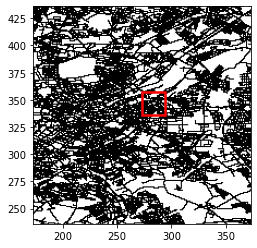

In [16]:
# Visualize road network
window = [16,13]
window_size = 21

fig, axes = plt.subplots(1, 1,)
axes.imshow(road, vmin=0, vmax=1, cmap="binary")
if window:
    rect = patches.Rectangle((window[1] * window_size, window[0] * window_size),
                             window_size, window_size,
                             linewidth=2.5, edgecolor="red", facecolor="none")
    axes.add_patch(rect)
    axes.set_xlim(window[1] * window_size - 100, window[1] * window_size + 100)
    axes.set_ylim(window[0] * window_size - 100, window[0] * window_size + 100)
plt.show()

# Read Incident Levels

In [10]:
incident_arr = np.zeros((18, 288, 495, 436))
# Iterate through all days and see days with highest incident level
for i, file in enumerate(glob.glob(os.path.join(DATA_DIR,"*.h5"))):
    d = dataload_utils.load_h5_file(file)
    incident = d[:, :, :, -1]
    del d
    incident_arr[i] = incident
    print(file.split("\\")[-1])
    if i==0:
        break

2019-07-01_berlin_9ch.h5


# Global Distribution of Incident Level

WHEN `type` = 'ROAD_CLOSURE' AND criticality = 'minor'        THEN 120

WHEN `type` = 'ROAD_CLOSURE' AND criticality = 'major'        THEN 240

WHEN `type` = 'ROAD_CLOSURE' AND criticality = 'critical'     THEN 360

WHEN `type` = 'LANE_RESTRICTION' AND criticality = 'minor'    THEN  80

WHEN `type` = 'LANE_RESTRICTION' AND criticality = 'major'    THEN 160

WHEN `type` = 'LANE_RESTRICTION' AND criticality = 'critical' THEN 240

WHEN `type` = 'ROAD HAZARD' AND criticality = 'minor'         THEN  70

WHEN `type` = 'ROAD HAZARD' AND criticality = 'major'         THEN 140

WHEN `type` = 'ROAD HAZARD' AND criticality = 'critical'      THEN 210

WHEN `type` = 'PLANNED EVENT' AND criticality = 'minor'       THEN  60

WHEN `type` = 'PLANNED EVENT' AND criticality = 'major'       THEN 120

WHEN `type` = 'PLANNED EVENT' AND criticality = 'critical'    THEN 180

WHEN `type` = 'CONSTRUCTION' AND criticality = 'minor'        THEN  50

WHEN `type` = 'CONSTRUCTION' AND criticality = 'major'        THEN 100

WHEN `type` = 'CONSTRUCTION' AND criticality = 'critical'     THEN 150

In [37]:
INCIDENT_LEVEL = {
    120: "ROAD_CLOSURE-MINOR" +","+ "PLANNED_EVENT-MAJOR",
    240: "ROAD_CLOSURE-MAJOR" +","+ "LANE_RESTRICTION-CRITICAL",
    360: "ROAD_CLOSURE-CRITICAL",
    80: "LANE_RESTRICTION-MINOR",
    160: "LANE_RESTRICTION-MAJOR",
    70: "ROAD_HAZARD-MINOR",
    140: "ROAD_HAZARD-MAJOR",
    210: "ROAD_HAZARD-CRITICAL",
    60: "PLANNED_EVENT-MINOR",
    180: "PLANNED_EVENT-CRITICAL",
    50: "CONSTRUCTION-MINOR",
    100: "CONSTRUCTION-MAJOR",
    150: "CONSTRUCTION-CRITICAL",
}

## When pixels within road network, how the incident level distributes?

In [22]:
DAY = 0

incident_dsb = incident_arr[DAY][:, road].reshape(-1)
value, count = np.unique(incident_dsb, return_counts=True)

In [43]:
df = pd.DataFrame(data=np.array([value, count]).transpose(), columns=["value","count"])
df["incident"] = df["value"].apply(lambda _ : INCIDENT_LEVEL[int(_)] if int(_) in INCIDENT_LEVEL.keys() else "None")
df['percent'] = df["count"]/df["count"].sum()
df.sort_values("percent", ascending=False)

,value,count,incident,percent
0,0.0,23137540.0,None,0.994512
1,50.0,53537.0,CONSTRUCTION-MINOR,0.002301
9,150.0,40450.0,CONSTRUCTION-CRITICAL,0.001739
13,255.0,20928.0,None,0.000900
5,100.0,7612.0,CONSTRUCTION-MAJOR,0.000327
4,80.0,1272.0,LANE_RESTRICTION-MINOR,0.000055
10,180.0,1176.0,PLANNED_EVENT-CRITICAL,0.000051
11,200.0,1152.0,None,0.000050
3,70.0,682.0,ROAD_HAZARD-MINOR,0.000029
8,140.0,406.0,ROAD_HAZARD-MAJOR,0.000017


# Local temporal variation of incident levels